In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,Rank,State/Union territory,"Nominal GDP (Trillion INR, lakh crore)",Data year,Comparable country,GDP per capita
0,1,Maharashtra,?29.79 lakh crore (US$420 billion),201920,United Arab Emirates,198510
1,2,Tamil Nadu,?18.54 lakh crore (US$260 billion),201920,Portugal,190659
2,3,Gujarat,?17.01 lakh crore (US$240 billion),201920,Portugal,199463
3,4,Karnataka,?15.88 lakh crore (US$220 billion),201920,Peru,205813
4,5,Uttar Pradesh,?15.79 lakh crore (US$220 billion),201920,Peru,62323


In [3]:
India_GDP.drop(["Data year","Comparable country","Rank"],axis=1,inplace=True)
India_GDP.head()

,State/Union territory,"Nominal GDP (Trillion INR, lakh crore)",GDP per capita
0,Maharashtra,?29.79 lakh crore (US$420 billion),198510
1,Tamil Nadu,?18.54 lakh crore (US$260 billion),190659
2,Gujarat,?17.01 lakh crore (US$240 billion),199463
3,Karnataka,?15.88 lakh crore (US$220 billion),205813
4,Uttar Pradesh,?15.79 lakh crore (US$220 billion),62323


In [4]:
India_GDP["Nominal GDP (Trillion INR, lakh crore)"]=India_GDP["Nominal GDP (Trillion INR, lakh crore)"].str[1:5]
India_GDP.head()

,State/Union territory,"Nominal GDP (Trillion INR, lakh crore)",GDP per capita
0,Maharashtra,29.7,198510
1,Tamil Nadu,18.5,190659
2,Gujarat,17.0,199463
3,Karnataka,15.8,205813
4,Uttar Pradesh,15.7,62323


In [5]:
India_GDP.columns=["State/UnionTerritory","Nominal GDP","GDP per capita"]
India_GDP["Nominal GDP"]=India_GDP["Nominal GDP"].apply(pd.to_numeric)
India_GDP["Nominal GDP"]=India_GDP["Nominal GDP"]*1000000000000
India_GDP.head()

,State/UnionTerritory,Nominal GDP,GDP per capita
0,Maharashtra,2.970000e+13,198510
1,Tamil Nadu,1.850000e+13,190659
2,Gujarat,1.700000e+13,199463
3,Karnataka,1.580000e+13,205813
4,Uttar Pradesh,1.570000e+13,62323


In [6]:
India_GDP=India_GDP.sort_values("State/UnionTerritory")
India_GDP.head()

,State/UnionTerritory,Nominal GDP,GDP per capita
28,Andaman and Nicobar Islands,6.000000e+10,178485
6,Andhra Pradesh,1.080000e+13,158607
23,Arunachal Pradesh,2.300000e+11,139617
12,Bihar,5.730000e+12,41992
22,Chandigarh,3.100000e+11,333667


In [7]:
India_GDP.set_index("State/UnionTerritory",inplace=True)
India_GDP.head()

,Nominal GDP,GDP per capita
State/UnionTerritory,,
Andaman and Nicobar Islands,6.000000e+10,178485
Andhra Pradesh,1.080000e+13,158607
Arunachal Pradesh,2.300000e+11,139617
Bihar,5.730000e+12,41992
Chandigarh,3.100000e+11,333667


In [8]:
body = client_e4dc9a104f744e5aae7dc65f2911bb20.get_object(Bucket='covid19dataanalysis-donotdelete-pr-aqhf2osdsh4adq',Key='covid_19_india.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Covid19_India = pd.read_csv(body)
Covid19_India.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
Covid19_India.drop(["Sno","ConfirmedIndianNational","Time","ConfirmedForeignNational","Cured","Confirmed"],axis=1,inplace=True)
Covid19_India.head()

,Date,State/UnionTerritory,Deaths
0,30/01/20,Kerala,0
1,31/01/20,Kerala,0
2,01/02/20,Kerala,0
3,02/02/20,Kerala,0
4,03/02/20,Kerala,0


In [13]:
Covid19_India["Date"] = pd.to_datetime(Covid19_India["Date"]).dt.strftime('%m-%d-%Y')
Covid19_India.head()

,Date,State/UnionTerritory,Deaths
0,01-30-2020,Kerala,0
1,01-31-2020,Kerala,0
2,02-01-2020,Kerala,0
3,02-02-2020,Kerala,0
4,02-03-2020,Kerala,0


In [14]:
Covid19_pivot=Covid19_India.pivot(index="State/UnionTerritory", columns="Date",values="Deaths").reset_index()
Covid19_pivot.columns.name=None
Covid19_pivot.head()

,State/UnionTerritory,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,...,07-28-2020,07-29-2020,07-30-2020,07-31-2020,08-01-2020,08-02-2020,08-03-2020,08-04-2020,08-05-2020,08-06-2020
0,Andaman and Nicobar Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,4.0,5.0,7.0,8.0,10.0,12.0,14.0
1,Andhra Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1090.0,1148.0,1213.0,1281.0,1349.0,1407.0,1474.0,1537.0,1604.0,1681.0
2,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,Assam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,88.0,92.0,94.0,98.0,101.0,105.0,109.0,115.0,121.0
4,Bihar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,253.0,269.0,278.0,282.0,296.0,309.0,329.0,330.0,347.0,355.0


In [15]:
Covid19_pivot=Covid19_pivot.fillna(0)
Covid19_pivot.head()

,State/UnionTerritory,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,...,07-28-2020,07-29-2020,07-30-2020,07-31-2020,08-01-2020,08-02-2020,08-03-2020,08-04-2020,08-05-2020,08-06-2020
0,Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,4.0,5.0,7.0,8.0,10.0,12.0,14.0
1,Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1090.0,1148.0,1213.0,1281.0,1349.0,1407.0,1474.0,1537.0,1604.0,1681.0
2,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,88.0,92.0,94.0,98.0,101.0,105.0,109.0,115.0,121.0
4,Bihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.0,269.0,278.0,282.0,296.0,309.0,329.0,330.0,347.0,355.0


In [16]:
Covid19_pivot.set_index("State/UnionTerritory",inplace=True)
Covid19_pivot.head()

,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,...,07-28-2020,07-29-2020,07-30-2020,07-31-2020,08-01-2020,08-02-2020,08-03-2020,08-04-2020,08-05-2020,08-06-2020
State/UnionTerritory,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,4.0,5.0,7.0,8.0,10.0,12.0,14.0
Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1090.0,1148.0,1213.0,1281.0,1349.0,1407.0,1474.0,1537.0,1604.0,1681.0
Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,88.0,92.0,94.0,98.0,101.0,105.0,109.0,115.0,121.0
Bihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.0,269.0,278.0,282.0,296.0,309.0,329.0,330.0,347.0,355.0


In [17]:
states= list(Covid19_pivot.index)
max_death_rates = []
for s in states:
    max_death_rates.append(Covid19_pivot.loc[s].diff().max())
Covid19_pivot["max_death_rates"]=max_death_rates
Covid19_pivot.head()

,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,...,07-29-2020,07-30-2020,07-31-2020,08-01-2020,08-02-2020,08-03-2020,08-04-2020,08-05-2020,08-06-2020,max_death_rates
State/UnionTerritory,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,5.0,7.0,8.0,10.0,12.0,14.0,2.0
Andhra Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1148.0,1213.0,1281.0,1349.0,1407.0,1474.0,1537.0,1604.0,1681.0,77.0
Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.0,92.0,94.0,98.0,101.0,105.0,109.0,115.0,121.0,8.0
Bihar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,269.0,278.0,282.0,296.0,309.0,329.0,330.0,347.0,355.0,20.0


In [18]:
Covid19_final=pd.DataFrame(Covid19_pivot["max_death_rates"])
Covid19_final.head()

,max_death_rates
State/UnionTerritory,
Andaman and Nicobar Islands,2.0
Andhra Pradesh,77.0
Arunachal Pradesh,1.0
Assam,8.0
Bihar,20.0


In [19]:
data=Covid19_final.join(India_GDP, how="inner")
data.head()

,max_death_rates,Nominal GDP,GDP per capita
State/UnionTerritory,,,
Andaman and Nicobar Islands,2.0,6.000000e+10,178485
Andhra Pradesh,77.0,1.080000e+13,158607
Arunachal Pradesh,1.0,2.300000e+11,139617
Bihar,20.0,5.730000e+12,41992
Chandigarh,3.0,3.100000e+11,333667


In [20]:
data.corr()

,max_death_rates,Nominal GDP,GDP per capita
max_death_rates,1.000000,0.740082,0.142776
Nominal GDP,0.740082,1.000000,-0.055582
GDP per capita,0.142776,-0.055582,1.000000


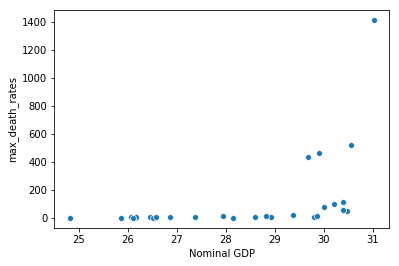

In [25]:
x=data["Nominal GDP"]
y=data["max_death_rates"]
sns.scatterplot(np.log(x),y)

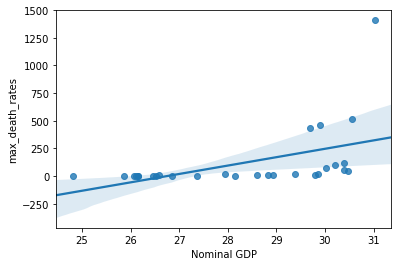

In [26]:
sns.regplot(np.log(x),y)

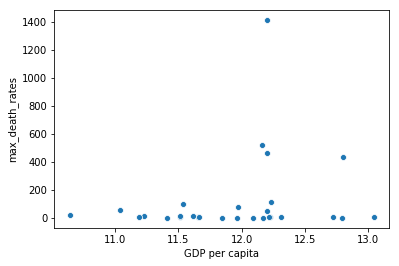

In [23]:
x=data["GDP per capita"]
y=data["max_death_rates"]
sns.scatterplot(np.log(x),y)

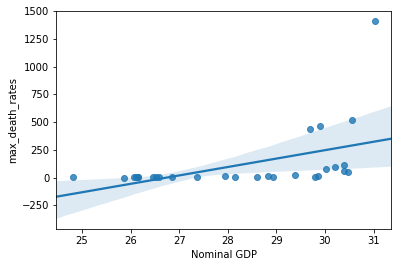

In [27]:
sns.regplot(np.log(x),y)